In [29]:
""" This notebook is a part of the short paper, "Evaluating the Effectiveness of The Representative K-Means Method for Vector Quantization in Image Compression"
    Author/copyright: Krystal Ly.  
    Date: 20 February 2023. 
"""

#SET UP

#import libraries
import pandas as pd
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import helper
import imp
#set up path
import os
PATH = os.getcwd()

## Carrot Dataset

### Load images

In [3]:
data = np.zeros((200,224*224*3), dtype = int)

#load 200 carrot images
for i in range(1,201):
    file_link = PATH + f'/dataset/Carrot/1{i:03}.jpg'.format(i)
    im = Image.open(file_link)
    im = im.resize((224,224))
    a = np.asarray(im)
    
    data[i-1,:] = a.reshape(224*224*3)
    if i % 50 == 0:
        print("Successfully load {} images".format(i))

Successfully load 50 images
Successfully load 100 images
Successfully load 150 images
Successfully load 200 images


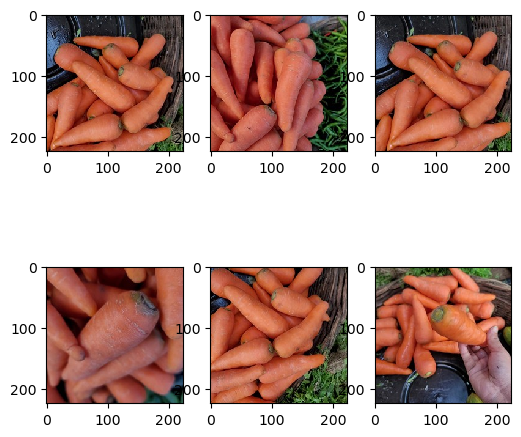

In [4]:
#take a look at some images

_, axs = plt.subplots(2, 3, figsize=(6, 6))
axs = axs.flatten()
for img, ax in zip(data, axs):
    img = img.reshape(224,224,3)
    ax.imshow(img)
plt.show()

### Choosing representative images
for every 50 images, choose 4

In [5]:
k_means = helper.my_k_means(k = 4)
centers_rep, num_iters_rep, current_mse_rep, clusters_rep = k_means.fit(data)
representatives = k_means.closest_to_clusters()

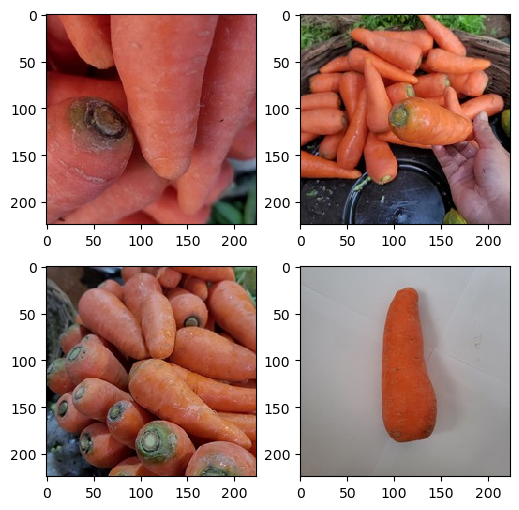

In [6]:
_, axs = plt.subplots(2, 2, figsize=(6, 6))
axs = axs.flatten()
for img, ax in zip(data[representatives], axs):
    img = img.reshape(224,224,3)
    ax.imshow(img)
plt.show()

### Vector Quantization on representative images

In [7]:
compressed_rep_imgs, rep_vqs = helper.compress_rep_im(data[representatives], 224, 224, 36, "rgb")


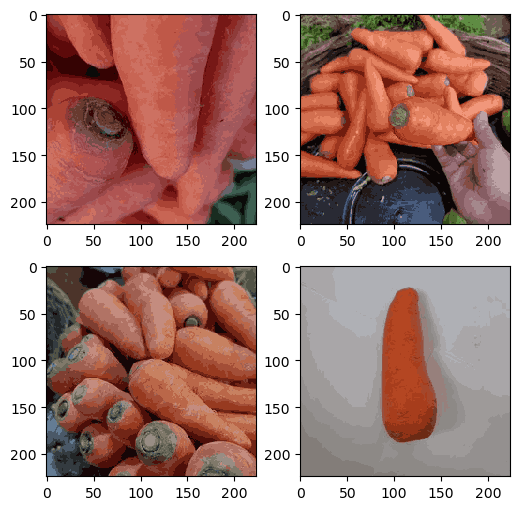

In [8]:
_, axs = plt.subplots(2, 2, figsize=(6, 6))
axs = axs.flatten()
for img, ax in zip(compressed_rep_imgs, axs):
    img = img.reshape(224,224,3)
    ax.imshow(img)
plt.show()

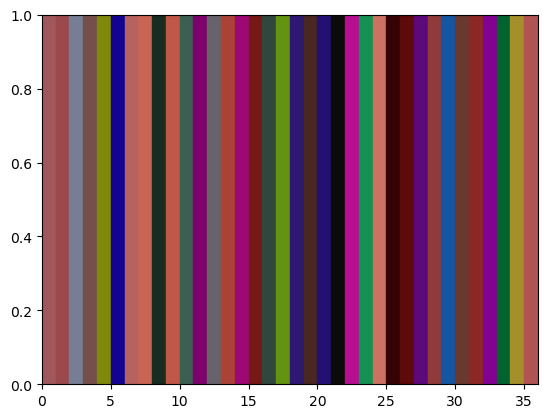

In [9]:
# Create a plot with colored rectangles for each RGB value
center_color = rep_vqs[0]['centers']/255
fig, ax = plt.subplots()
for i in range(len(center_color)):
    rect = plt.Rectangle((i, 0), 1, 1, color=center_color[i])
    ax.add_patch(rect)

# Set the plot limits and display the plot
plt.xlim((0, len(center_color)))
plt.ylim((0, 1))
plt.show()

### Apply vector quantization on other images

In [10]:
compressed_data = helper.compressed_other_imgs(data, clusters_rep, centers_rep, rep_vqs, 224, 224, "rgb")

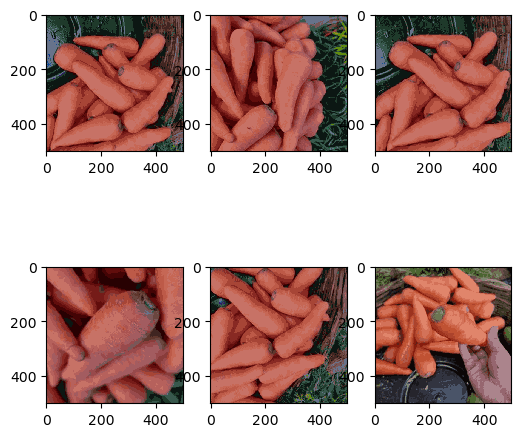

In [12]:
_, axs = plt.subplots(2, 3, figsize=(6, 6))
axs = axs.flatten()
for img, ax in zip(compressed_data, axs):
    img = img.reshape(224,224,3)
    ax.imshow(img)
plt.show()

### Image Quality Metrics

In [13]:
carrot_mse_arr = helper.mean_squared_error(data, compressed_data)

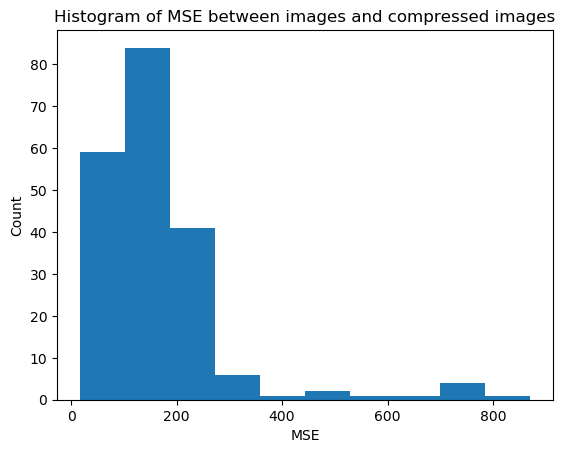

In [14]:
plt.hist(carrot_mse_arr)
plt.title('Histogram of MSE between images and compressed images')
plt.xlabel('MSE')
plt.ylabel('Count')
plt.show()

In [15]:
round(np.median(carrot_mse_arr),2)

131.16

Since the distribution is skewed, we use median instead of mean to represent the effect

### Try different k

In [11]:
result = pd.DataFrame({'dataset':[], 'k':[], 'median_mse_with_reps':[], 'median_mse_individual':[]})
imp.reload(helper)
k_list = [12,24,36]
result['median_mse_with_reps'] = helper.vq_on_diff_k(k_list, data ,img_width = 224, img_height = 224, type = "rgb")
result['k'] = k_list
result['dataset'] = ['carrot' for i in range(len(k_list))]

Done with k = {} 12
Done with k = {} 24
Done with k = {} 36


## Human dataset 

In [26]:
data = np.zeros((200,224*224*3), dtype = int)
done = False 
img_idx = 0
data_idx = 0

while not done:
    file_link = PATH + "/dataset/without_mask/image_{}.png".format(img_idx)
    im = Image.open(file_link)
    im = im.resize((224,224))
    a = np.asarray(im)
    try: 
        a = a.reshape(224*224*3)
    except: 
        img_idx+=1
        continue
    data[data_idx,:] = a
    if (data_idx+1) % 50 == 0:
        print("Successfully load {} images".format(data_idx+1))
    if data_idx == 199:
        done = True
    data_idx+=1
    img_idx += 1

Successfully load 50 images
Successfully load 100 images
Successfully load 150 images
Successfully load 200 images


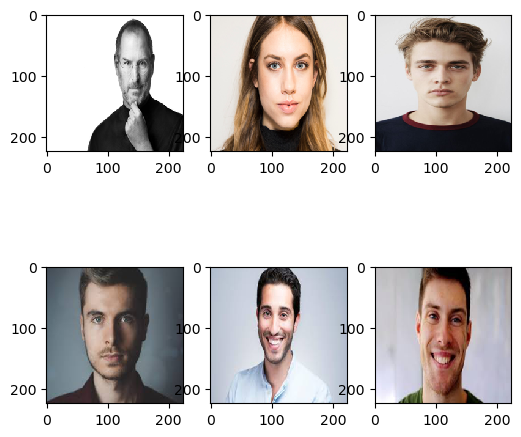

In [27]:
#take a look at some images

_, axs = plt.subplots(2, 3, figsize=(6, 6))
axs = axs.flatten()
for img, ax in zip(data, axs):
    img = img.reshape(224,224,3)
    ax.imshow(img)
plt.show()

In [28]:
k_means = helper.my_k_means(k = 4)
centers_rep, num_iters_rep, current_mse_rep, clusters_rep = k_means.fit(data)
representatives = k_means.closest_to_clusters()

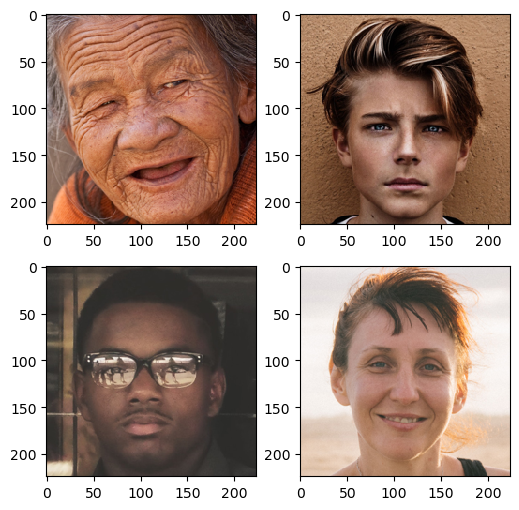

In [30]:
_, axs = plt.subplots(2, 2, figsize=(6, 6))
axs = axs.flatten()
for img, ax in zip(data[representatives], axs):
    img = img.reshape(224,224,3)
    ax.imshow(img)
plt.show()

In [ ]:
new_result = pd.DataFrame({'dataset':[], 'k':[], 'median_mse':[]})
imp.reload(helper)
k_list = [12,24,36,48,60]
new_result['median_mse'] = helper.vq_on_diff_k(k_list, data ,img_width = 224, img_height = 224, type = "rgb")
new_result['k'] = k_list
new_result['dataset'] = ['human' for i in range(len(k_list))]
result = pd.concat([result, new_result], ignore_index= True)
result

## Human black and white dataset

In [34]:
from PIL import Image, ImageOps

data = np.zeros((200,224*224), dtype = int)
done = False 
img_idx = 0
data_idx = 0

while not done:
    file_link = PATH + "/dataset/without_mask/image_{}.png".format(img_idx)
    im = Image.open(file_link)
    im = im.resize((224,224))
    im = ImageOps.grayscale(im)
    a = np.asarray(im)
    try: 
        a = a.reshape(224*224)
    except: 
        img_idx+=1
        continue
    data[data_idx,:] = a
    if (data_idx+1) % 50 == 0:
        print("Successfully load {} images".format(data_idx+1))
    if data_idx == 199:
        done = True
    data_idx+=1
    img_idx += 1

Successfully load 50 images
Successfully load 100 images
Successfully load 150 images
Successfully load 200 images


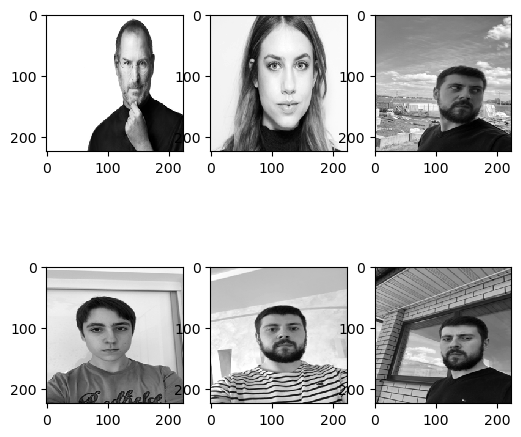

In [35]:
#take a look at some images

_, axs = plt.subplots(2, 3, figsize=(6, 6))
axs = axs.flatten()
for img, ax in zip(data, axs):
    img = img.reshape(224,224)
    ax.imshow(img, cmap = 'gray')
plt.show()

In [36]:
k_means = helper.my_k_means(k = 4)
centers_rep, num_iters_rep, current_mse_rep, clusters_rep = k_means.fit(data)
representatives = k_means.closest_to_clusters()

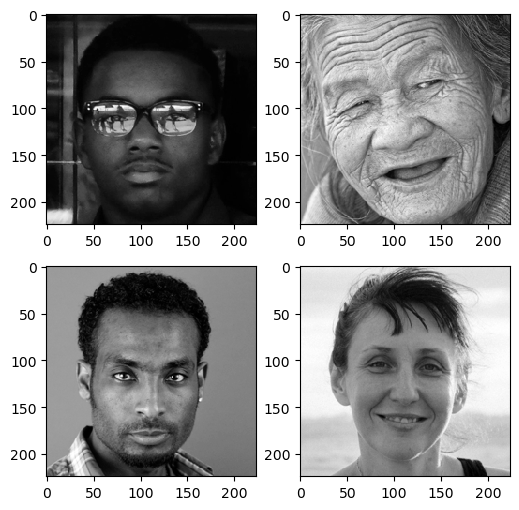

In [40]:
_, axs = plt.subplots(2, 2, figsize=(6, 6))
axs = axs.flatten()
for img, ax in zip(data[representatives], axs):
    img = img.reshape(224,224)
    ax.imshow(img, cmap = 'gray')
plt.show()

In [35]:
new_result = pd.DataFrame({'dataset':[], 'k':[], 'median_mse':[]})
imp.reload(helper)
k_list = [12,24,36,48,60]
new_result['median_mse'] = helper.vq_on_diff_k(k_list, data ,img_width = 224, img_height = 224, type = "grayscale")
new_result['k'] = k_list
new_result['dataset'] = ['human b&w' for i in range(len(k_list))]
result = pd.concat([result, new_result], ignore_index= True)

,dataset,k,median_mse
0,carrot,12,219.29
1,carrot,24,168.54
2,carrot,36,131.16
3,carrot,48,118.23
4,carrot,60,106.18
5,human b&w,12,61.14
6,human b&w,24,25.20
7,human b&w,36,9.99
8,human b&w,48,6.92
9,human b&w,60,4.63
